# Future Climate Data Download for HSPF Model input 
Shuvashish Roy, Dynamic Solutions LLC 

In [1]:
%matplotlib inline
import xarray as xr

# 2015-2024 netCDF ts file read, and data analysis 
#### read one already downloaded netcdf file from my local hardrive, you can set the url also instead of the local drive. 

In [2]:
fname = 'C:/Shuvashish/Cloud netcdf/clt_day_CNRM-CM6-1_highresSST-future_r3i1p1f2_gr_20150101-20241231.nc'  

#### Let's extract the data from Chattanooga, TN area. Lat=35.045, Lon= -85.2. We will use lon= -85.2+360=274.8 for global/positive  coordinate used by xarray 

In [3]:
ds = xr.open_dataset(fname)
dsloc = ds.sel(lon= 274.8,lat=35.045,method='nearest') # data only for Chattanooga area 

#### Check the variables and see if cloud fractions/clt is present along with lat, lon and time 

In [4]:
print(ds) # check the variables

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 128, lon: 256, time: 3653)
Coordinates:
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time         (time) datetime64[ns] 2015-01-01T12:00:00 ... 2024-12-31T12:...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    clt          (time, lat, lon) float32 ...
Attributes: (12/54)
    name:                   /scratch/utmp/ftdir/cglo765/eclis/transfers/CNRM-...
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2019-03-26T18:06:24Z
    description:            Extend highresSST-present to 2050 with agreed SSP...
    title:                  CNRM-CM6-1 model output prepared for CMIP6 / High...
    activity_id:            HighResMIP
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum: 

#### plot contours of the cloud fractions data

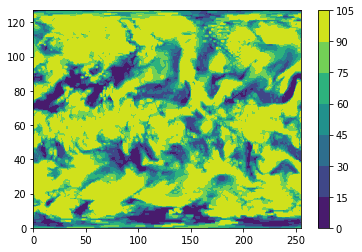

In [5]:
import matplotlib.pyplot as plt
plt.contourf(ds['clt'][0,:,:]) # check if the data is 3D by creating a contour, though time dim is removed
plt.colorbar()

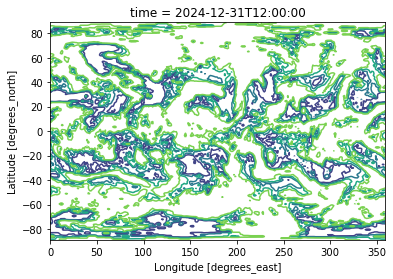

In [6]:
ds.clt.isel(time=-1).plot.contour() # another contour

#### Plot cloud cover/fractions time series for Chattanooga, TN

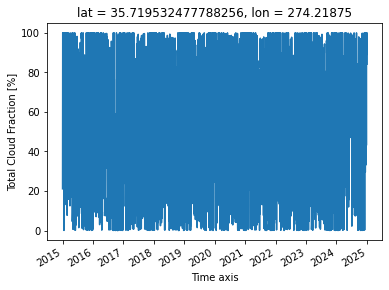

In [7]:
dsloc['clt'].plot();

#### Check the lists inside the array 

In [8]:
a=dsloc['clt']
a.head()

<xarray.DataArray 'clt' (time: 5)>
array([ 21.087347, 100.      , 100.      , 100.      , 100.      ],
      dtype=float32)
Coordinates:
    lat      float64 35.72
    lon      float64 274.2
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2015-01-05T12:00:00
Attributes:
    long_name:           Total Cloud Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 d
    standard_name:       cloud_area_fraction
    description:         for the whole atmospheric column, as seen from the s...
    history:             none
    cell_measures:       area: areacella

#### Above daily time series plot looks overcrowded . So, resample the daily data to monthly data

In [9]:
monthly_ds = ds.resample(time = 'm', ).mean()

#### Extract monthly data for Chattanooga, you can also extract data for any other places

In [10]:
monthly_ds_loc=monthly_ds.sel(lon= 274.8,lat=35.045,method='nearest')


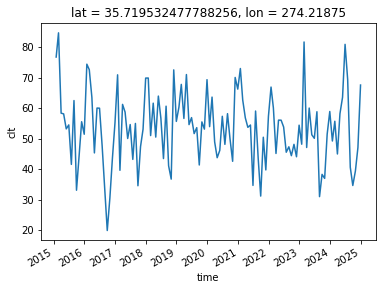

In [11]:
monthly_ds_loc['clt'].plot() # plot montlhy cloud fraction data

# 2015-2050 datasets combine 
#### Merge/combine multiple netcdf the files using glob
I have couple of nc files that has cloud data of differenttime periods

In [12]:
import xarray
import glob
ds_combined_glob = xarray.merge([xarray.open_dataset(f) for f in glob.glob('C:/Shuvashish/Cloud netcdf/*.nc')])

In [13]:
from glob import glob 
files=glob('C:/Shuvashish/Cloud netcdf/*.nc',recursive = True)
for file in files:
    print(file) # check out the names of the files inside .....netcdf cloud/ New folder;

C:/Shuvashish/Cloud netcdf\clt_day_CNRM-CM6-1_highresSST-future_r3i1p1f2_gr_20150101-20241231.nc
C:/Shuvashish/Cloud netcdf\clt_day_CNRM-CM6-1_highresSST-future_r3i1p1f2_gr_20250101-20341231.nc
C:/Shuvashish/Cloud netcdf\clt_day_CNRM-CM6-1_highresSST-future_r3i1p1f2_gr_20350101-20441231.nc
C:/Shuvashish/Cloud netcdf\clt_day_CNRM-CM6-1_highresSST-future_r3i1p1f2_gr_20450101-20501231.nc


### Another simple memory efficient way to combine all the netcdf files is to use "xarray.open_mfdataset"

In [14]:
ds_combined = xarray.open_mfdataset('C:/Shuvashish/Cloud netcdf/*.nc')

### let's extract the combined dataset only for Chattanooga, TN

In [16]:
ds_combined_loc = ds_combined.sel(lon= 274.8,lat=35.045,method='nearest')

### plot to check the daily time series 

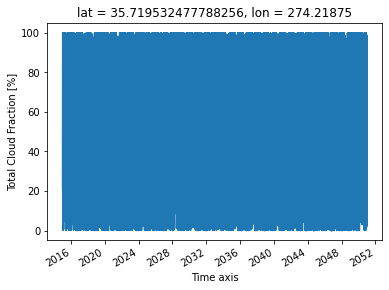

In [17]:
ds_combined_loc['clt'].plot();

In [18]:
monthly_ds_combined_loc = ds_combined_loc.resample(time = 'm', ).mean()

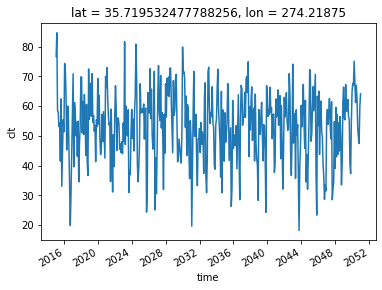

In [19]:
monthly_ds_combined_loc['clt'].plot()

### Slice the data from 2020 to 2050

In [20]:
ds_slice = monthly_ds_combined_loc.sel(time=slice('2020-01-01', '2050-12-31'))

Text(0, 0.5, 'Total Cloud Fraction (%)')

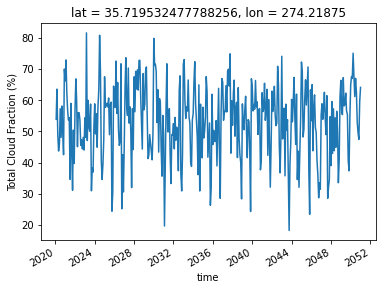

In [21]:
import matplotlib.pyplot as plt
plt.figure()
ds_slice['clt'].plot()
plt.ylabel('Total Cloud Fraction (%)')

## Save as CSV
#### Save daily "Cloud cover"  time series from 2020 to 2050 in a CSV file  for HSPF climate change analysis

In [22]:
path='C:/Shuvashish/Cloud netcdf/'
clt_ts = ds_slice['clt']  

clt_ts.to_pandas().to_csv(path+'clt_daily_2020_2050.csv') 

#### Now have a look at the first  and last few lines of the csv file 

In [23]:
import pandas as pd
df = pd.read_csv(path+'clt_daily_2020_2050.csv')
df.head(10)  # first 10 lines

,time,0
0,2020-01-31,53.892574
1,2020-02-29,63.581295
2,2020-03-31,48.894886
3,2020-04-30,43.713478
4,2020-05-31,46.113570
5,2020-06-30,57.290730
6,2020-07-31,48.088140
7,2020-08-31,58.152126
8,2020-09-30,49.833736
9,2020-10-31,42.536972


In [24]:
df.tail(5) # last 5 lines

,time,0
367,2050-08-31,52.903270
368,2050-09-30,49.602550
369,2050-10-31,47.446327
370,2050-11-30,59.473240
371,2050-12-31,64.140110


In [25]:
df['time']=pd.to_datetime(df['time']) # convert the 'time' cluomn into datetime
df

,time,0
0,2020-01-31,53.892574
1,2020-02-29,63.581295
2,2020-03-31,48.894886
3,2020-04-30,43.713478
4,2020-05-31,46.113570
...,...,...
367,2050-08-31,52.903270
368,2050-09-30,49.602550
369,2050-10-31,47.446327
370,2050-11-30,59.473240


#### Daily to hourly Upsampling for HSPF input

In [26]:
df1 = df.set_index('time').resample('1H').pad()
df1.columns=['Cloud Cover (%)']

In [27]:
df1.head()

,Cloud Cover (%)
time,
2020-01-31 00:00:00,53.892574
2020-01-31 01:00:00,53.892574
2020-01-31 02:00:00,53.892574
2020-01-31 03:00:00,53.892574
2020-01-31 04:00:00,53.892574


In [28]:
df1.tail()

,Cloud Cover (%)
time,
2050-12-30 20:00:00,59.47324
2050-12-30 21:00:00,59.47324
2050-12-30 22:00:00,59.47324
2050-12-30 23:00:00,59.47324
2050-12-31 00:00:00,64.14011


##### Save hourly data as a CSV file

In [29]:
path='C:/Shuvashish/Cloud netcdf/'

df1.to_csv(path+'clt_hourly_2020_2050.csv') 

##### Thanks !!!